## Machine Learning For Turbulent Fluid Dynamics : Evaluation Test

### Notebook Imports

In [1]:
import numpy as np   # for mathematical calculation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns   # for visualization
import pandas as pd     # for representing data

- Question 1 : Generate a 10 X 10 symmetric matrix with real-valued but random matrix elements between -1.0 and 1.0.

In [2]:
def create_symmetric(x,y,matrix_size):
    """
    x : (intteger) Lower limit of range between which you want to generate numbers.
    y : (integer) Upper limit of range between which you want to generate numbers.
    matrix_size : (Tuple) The size of square matrix you want to generate.
    
    Returns a random matrix and a corresponding symmetric matrix.
    
    """
    matrix=np.random.uniform(x,y,size=matrix_size)# draws samples from a uniform distribution between x and y.
    symmetric= np.around((matrix + matrix.T)/2,3)            # Performs matrix product to get symmetric matrix (A + A^T)/2.
    return matrix,symmetric

In [3]:
random_matrix,symmetric=create_symmetric(-1,1,matrix_size=(10,10))  #  Let x=-1 and y=-1 and size of matrix is (10,10)

In [4]:
print(random_matrix) # generated random matrix

[[ 0.78860132 -0.1072     -0.36575832 -0.82283899  0.51328006  0.11208215
   0.40009004  0.40267727  0.4561114  -0.65585446]
 [-0.35716249 -0.17867268 -0.577643   -0.74002483  0.80511683  0.62473251
  -0.84101854 -0.22384917 -0.0530009   0.13407882]
 [-0.41927887 -0.73805806 -0.56730476  0.17720337 -0.3143143   0.08789979
   0.68773606 -0.04634738  0.86950862 -0.95978878]
 [-0.04764575 -0.07729734 -0.48602949 -0.78431325  0.22891444  0.58701811
   0.21558359 -0.93107414  0.84894247  0.55774139]
 [-0.37800773 -0.99133444 -0.97128309  0.34687118  0.39895807  0.91786122
  -0.4815314  -0.36967607 -0.12070567  0.11747585]
 [-0.04677068 -0.87654954 -0.72820994 -0.43793973 -0.20755419  0.97522889
  -0.8950342  -0.74710618 -0.82976506  0.09238311]
 [ 0.68594294  0.26364098 -0.95658375 -0.32363213 -0.9741964  -0.98944204
   0.38548882 -0.5102054  -0.3476201   0.10039906]
 [-0.10366375  0.52005759  0.90372245 -0.16554399  0.23261266 -0.71480715
   0.63828103 -0.20001657  0.03728711  0.67999718]


In [5]:
print(symmetric)  # generated symmetric matrix

[[ 0.789 -0.232 -0.393 -0.435  0.068  0.033  0.543  0.15  -0.143 -0.225]
 [-0.232 -0.179 -0.658 -0.409 -0.093 -0.126 -0.289  0.148 -0.296  0.494]
 [-0.393 -0.658 -0.567 -0.154 -0.643 -0.32  -0.134  0.429  0.046 -0.091]
 [-0.435 -0.409 -0.154 -0.784  0.288  0.075 -0.054 -0.548  0.562  0.371]
 [ 0.068 -0.093 -0.643  0.288  0.399  0.355 -0.728 -0.069 -0.354 -0.423]
 [ 0.033 -0.126 -0.32   0.075  0.355  0.975 -0.942 -0.731 -0.438  0.233]
 [ 0.543 -0.289 -0.134 -0.054 -0.728 -0.942  0.385  0.064  0.199 -0.134]
 [ 0.15   0.148  0.429 -0.548 -0.069 -0.731  0.064 -0.2    0.328 -0.051]
 [-0.143 -0.296  0.046  0.562 -0.354 -0.438  0.199  0.328 -0.837  0.055]
 [-0.225  0.494 -0.091  0.371 -0.423  0.233 -0.134 -0.051  0.055 -0.753]]


#### Question 2 : Make a graphic visualization of the matrix using a color scale.

### Method 1 - Using Seaborn

In [6]:
def seaborn_visualization(matrix,colormap='ocean',heading="Colormap of a Matrix"):
    """
    matrix : Takes an input matrix.
    colormap : color combination of the plot. You can use matplotlib colormaps.
    
    Returns a colormap of the input matrix of desired colormap
    """
    plt.figure(figsize=(10,6),dpi=80)
    sns.heatmap(matrix,cmap=colormap,annot=True)
    plt.title(heading, fontsize=16)
    plt.xlabel("X coordinate",fontsize=14)
    plt.ylabel("Y coordinate",fontsize=14)
    plt.show()

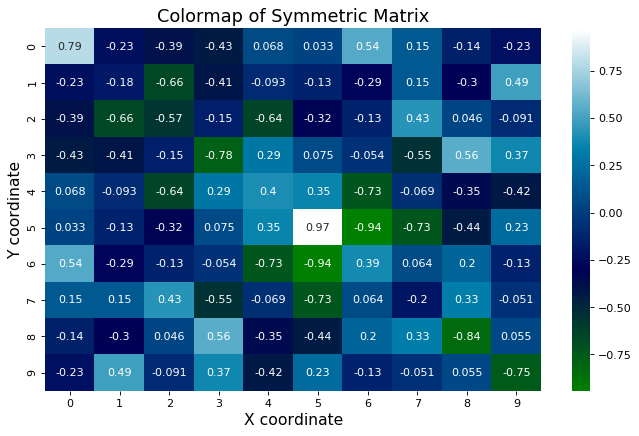

In [7]:
seaborn_visualization(symmetric,heading="Colormap of Symmetric Matrix")   # symmetric matrix colormap

### Method 2 - Using Matplotlib

In [8]:
def matplot_visualization(matrix,colormap='ocean',heading="Colormap of a Matrix"):
    """
    matrix : Takes an input matrix.
    colormap : color combination of the plot. You can use matplotlib colormaps.
    
    Returns a colormap of the input matrix of desired colormap
    """
    plt.figure(figsize=(10,6),dpi=80)
    plt.imshow(matrix,cmap=colormap)
    plt.colorbar()
    plt.title(heading, fontsize=16)
    plt.xlabel("X coordinate",fontsize=14)
    plt.ylabel("Y coordinate",fontsize=14)
    plt.clim(vmin=-1,vmax=1)
    plt.show()

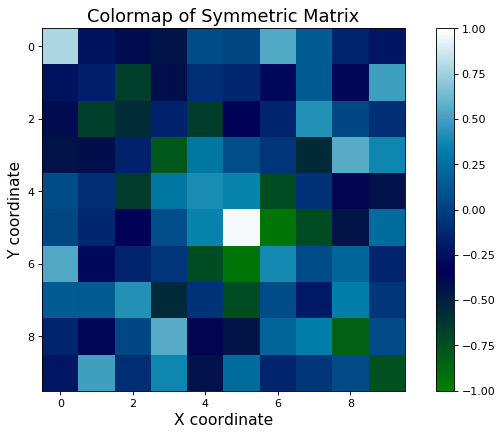

In [9]:
matplot_visualization(symmetric,heading="Colormap of Symmetric Matrix")  # symeetric matrix colormap

#### Question 3 - Find the eigenvectors / eigenvalues of the matrix

### Method 1 - Using Numpy Linear Algebra Module

In [10]:
def eigen_values_plus_vectors(matrix):
    """
    matrix : It takes an input matrix.
    
    Returns eigenvalues and eigenvectors of the matrix.
    """
    values,vectors=np.linalg.eig(matrix)  # linear algebra module eig() function returns eigenvalues and eigenvectors
    return values,vectors

In [11]:
eigenvalues,eigenvectors=eigen_values_plus_vectors(symmetric)  # calculating eigen values and eigenvectors of symmetric
# For complex eigenvalues, eigenvectors are also complex.

In [12]:
def create_eigenmapping(eigen_values,eigen_vectors):
    """
    eigen_values : Eigenvalues of a matrix.
    eigen_vectors : Eigenvectors of the corresponding eigen_values.
    
    Returns a dictionary of mapping keyas absolute eigenvalues and eigenvectors as value.
    
    """
    eigen_dict = {} # Dictionary to map eigenvalues with corresponding eigenvectors together.
    for i in range(len(eigenvalues)):
        eigen_dict[np.abs(eigenvalues[i])]=eigenvectors[i]  # Absolute Eigenvalues as key andd their eigenvector as values.
    return eigen_dict

In [13]:
eigen_dict=create_eigenmapping(eigenvalues,eigenvectors)
eigen_dict

{2.436810150937606: array([ 0.15077136, -0.836607  ,  0.03973881,  0.14247344, -0.03960772,
         0.29859322, -0.36006442, -0.14749198,  0.07029595, -0.09170822]),
 1.2670862286276303: array([-6.58099327e-02,  6.65432823e-02,  7.62133167e-02,  5.56653762e-01,
         1.27067476e-01,  7.71815651e-03, -1.31456553e-04,  2.42170904e-01,
        -4.82872492e-01, -6.06259716e-01]),
 1.8384415875808222: array([ 0.17262712,  0.27117637, -0.12474017,  0.62260864, -0.33881786,
         0.18853197,  0.0783025 , -0.53560087,  0.1580891 ,  0.15851827]),
 1.6826696956337865: array([-0.10236038,  0.1773949 ,  0.65388858,  0.24706757, -0.1263472 ,
         0.08114347, -0.38654656,  0.39905725,  0.25492039,  0.27063543]),
 1.1406903890655116: array([-0.38129108, -0.24446903, -0.27240727,  0.20430664, -0.29964242,
        -0.17016571,  0.03234002,  0.2178411 , -0.4547532 ,  0.55214313]),
 0.8370141751002147: array([-0.65078149, -0.14346217,  0.0234545 ,  0.15263991,  0.04813475,
        -0.48287342,

#### Question 4 - Create an approximation to the matrix by recreating it using only the two eigenvectors with largest absolute values.

### Method 2 - Using Singular Value Decomposition


- Getting the eigenvectors with two largest absolute values.

In [14]:
def matrix_approximation(matrix,k):
    """
    matrix : Takes an input matrix.
    k : The number of vectors from which you want to approximate.
    
    Returns an approximated matrix.
    """
    sigma=np.cov(matrix)
    U,S,V=np.linalg.svd(sigma)  # Gives the direction of the new dimension on which projection is made
                                # For our case input covariance matrix to svd().
    U_reduce=U[:,:k]
    Z=np.dot(matrix,U_reduce)
    matrix_approx=np.dot(Z,U_reduce.T)
    return matrix_approx

- SVD returns three things
- U- Columns of U are the eigenvectors of A.$A^H$
- V- Rows of V are the eigenvectors of $A^{H}$.A
- S- sotred from largest to smallest eigenvalues can be given by $S^{2}$.

In [15]:
approximate=matrix_approximation(symmetric,2) # taking 2 vectors with largest absolute eigenvalue

#### Question - 5 - Make a graphic visualization of the approximate matrix and compare it to the original matrix.

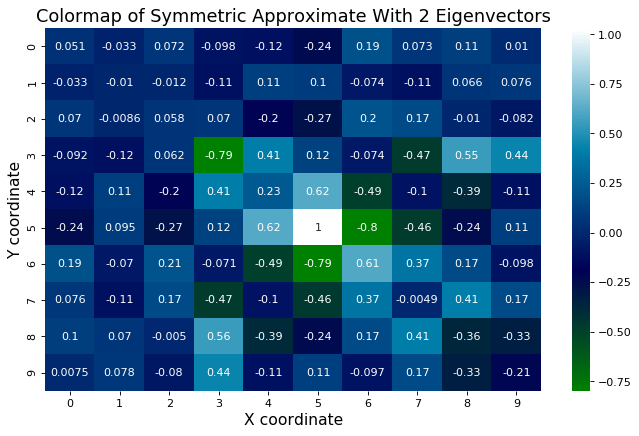

In [16]:
seaborn_visualization(approximate,heading="Colormap of Symmetric Approximate With 2 Eigenvectors")

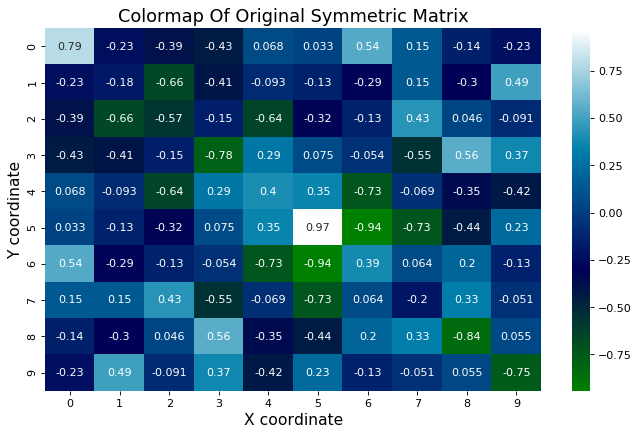

In [17]:
seaborn_visualization(symmetric,heading="Colormap Of Original Symmetric Matrix")

#### Comparing Results with Original Matrix According To Square Loss At Each Element After Taking 2 Eigenvectors Into Account

In [18]:
def loss(matrix1,matrix2):
    """
    matrix1 : First input matrix.
    matrix2 : Second input matrix.
    
    Returns the loss element wise and total loss.
    
    """
    loss_matrix=(matrix1**2) - (matrix2**2)   # Subtracting squares because to ignore the effect of negative sign.
    total_loss=np.sum(loss_matrix)   # adding loss at each element of the matrix.
    return np.around(total_loss,3),loss_matrix

In [19]:
total_loss_after2vec,loss_matrix_after2vec=loss(symmetric,approximate)

In [20]:
print("Total Loss is : ",total_loss_after2vec)
print("Loss Matrix is : \n",loss_matrix_after2vec)

Total Loss is :  7.357
Loss Matrix is : 
 [[ 0.61990161  0.05272396  0.14927917  0.17970558 -0.00879897 -0.05699549
   0.25927943  0.01721117  0.00911589  0.05051958]
 [ 0.05272025  0.03193568  0.43282126  0.15464935 -0.00388526  0.00592079
   0.07801897  0.01012137  0.08330184  0.23826717]
 [ 0.14949575  0.43288961  0.3180694   0.01878067  0.37261666  0.03191346
  -0.02334211  0.15467596  0.00200774  0.00155867]
 [ 0.18069634  0.15392721  0.01989026 -0.0149375  -0.08664643 -0.00931168
  -0.00257528  0.07972769  0.01162175 -0.05358851]
 [-0.00957018 -0.00363997  0.37178011 -0.08771325  0.10593042 -0.2596257
   0.28978822 -0.00613218 -0.02715284  0.1665319 ]
 [-0.05746273  0.00681044  0.02805494 -0.00897406 -0.25709426 -0.10958413
   0.25024732  0.32028824  0.13319665  0.04185074]
 [ 0.25938085  0.07863071 -0.02516469 -0.00212038  0.29323442  0.25700488
  -0.22988199 -0.13144549  0.01043304  0.00842059]
 [ 0.01672089  0.01028346  0.15489038  0.0808504  -0.00614432  0.32062111
  -0.13204

#### Question 6 - Repeat steps 4 and 5 above, but now use the four eigen vectors with the largest absolute values.

In [21]:
new_approximate=matrix_approximation(symmetric,4)  # taking 4 eigen vectors

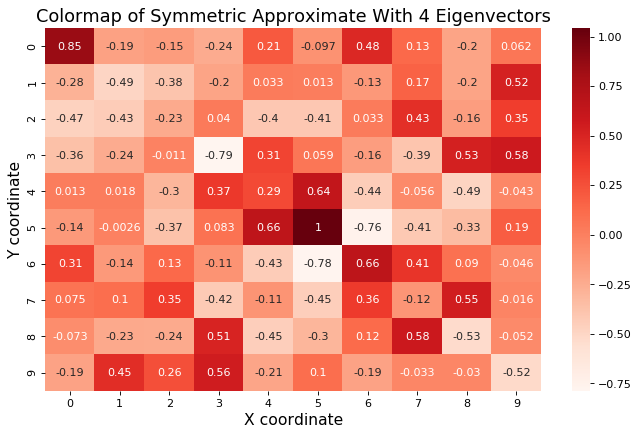

In [22]:
seaborn_visualization(new_approximate,colormap='Reds',heading="Colormap of Symmetric Approximate With 4 Eigenvectors")

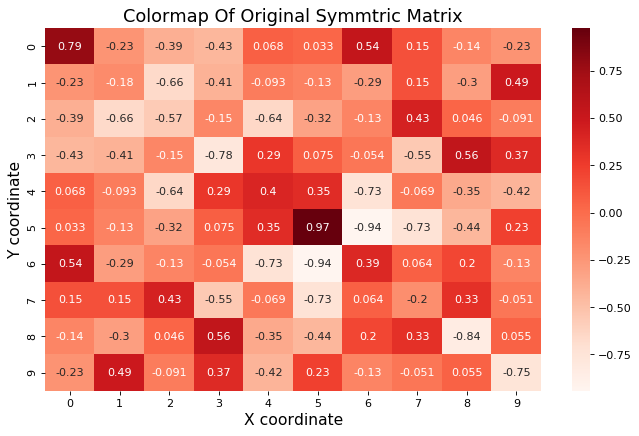

In [23]:
seaborn_visualization(symmetric,colormap="Reds",heading="Colormap Of Original Symmtric Matrix")

#### Comparing Results with Original Matrix According To Square Loss At Each Element After Taking 4 Eigenvectors Into Account

In [24]:
total_loss_after4vec,loss_matrix_after4vec=loss(symmetric,new_approximate)

In [25]:
print("Total Loss is : ",total_loss_after4vec)
print("Loss Matrix is : \n",loss_matrix_after4vec)

Total Loss is :  3.282
Loss Matrix is : 
 [[-1.01757416e-01  1.91955582e-02  1.30736808e-01  1.30260097e-01
  -3.82192736e-02 -8.29907766e-03  6.10256113e-02  4.60820041e-03
  -1.87276327e-02  4.67426312e-02]
 [-2.19574642e-02 -2.06054769e-01  2.85348045e-01  1.28738056e-01
   7.56556527e-03  1.56995868e-02  6.55075164e-02 -6.80885907e-03
   4.73540774e-02 -2.83329301e-02]
 [-6.81212926e-02  2.46134841e-01  2.67754600e-01  2.21150124e-02
   2.51750721e-01 -6.27001828e-02  1.68864105e-02  5.78996880e-04
  -2.50418247e-02 -1.12354994e-01]
 [ 5.64857968e-02  1.08831824e-01  2.35907054e-02 -5.61441402e-03
  -1.21552035e-02  2.18780844e-03 -2.41309064e-02  1.48531151e-01
   3.15890792e-02 -1.94853023e-01]
 [ 4.45859266e-03  8.32122071e-03  3.24535801e-01 -5.59281634e-02
   7.71261842e-02 -2.82635495e-01  3.38440741e-01  1.61413824e-03
  -1.11748765e-01  1.77057206e-01]
 [-1.89226841e-02  1.58693953e-02 -3.23757135e-02 -1.32989984e-03
  -3.12660364e-01 -1.33773255e-01  3.14693710e-01  3.6580

In [26]:
index_list=['Loss with 2 Eigenvectors','Loss with 4 Eigenvectors']
Loss_table=pd.DataFrame([total_loss_after2vec,total_loss_after4vec],index=index_list,columns=['Loss'])

In [27]:
Loss_table

,Loss
Loss with 2 Eigenvectors,7.357
Loss with 4 Eigenvectors,3.282


- More the number of eigen vectors you take to form the reduced matrix more you get convereged and the initial columns of the U matrix have more information.
- Minimum the loss more accurate results we get and loss will also get minimised with increase in number of eigenvectors we take while computation.

## Creating A Class Which Contains Everything For Approximation
### All Above Solutions Using A Class Named Approximation

In [28]:
class Approximation:
    
    def create_symmetric(self,x,y,matrix_size):
        """
        x : (intteger) Lower limit of range between which you want to generate numbers.
        y : (integer) Upper limit of range between which you want to generate numbers.
        matrix_size : (Tuple) The size of square matrix you want to generate.
    
        Returns a random matrix and a corresponding symmetric matrix.
    
        """
        matrix=np.random.uniform(x,y,size=matrix_size)# draws samples from a uniform distribution between x and y.
        symmetric= np.around((matrix + matrix.T)/2,3)            # Performs matrix product to get symmetric matrix (A + A^T)/2.
        return matrix,symmetric

    def seaborn_visualization(self,matrix,colormap='ocean',heading="Colormap of a Matrix"):
        """
        matrix : Takes an input matrix.
        colormap : color combination of the plot. You can use matplotlib colormaps.

        Returns a colormap of the input matrix of desired colormap
        """
        plt.figure(figsize=(10,6),dpi=80)
        sns.heatmap(matrix,cmap=colormap,annot=True)
        plt.title(heading, fontsize=16)
        plt.xlabel("X coordinate",fontsize=14)
        plt.ylabel("Y coordinate",fontsize=14)
        plt.show()

    def matplot_visualization(self,matrix,colormap='ocean',heading="Colormap of a Matrix"):
        """
        matrix : Takes an input matrix.
        colormap : color combination of the plot. You can use matplotlib colormaps.

        Returns a colormap of the input matrix of desired colormap
        """
        plt.figure(figsize=(10,6),dpi=80)
        plt.imshow(matrix,cmap=colormap)
        plt.colorbar()
        plt.title(heading, fontsize=16)
        plt.xlabel("X coordinate",fontsize=14)
        plt.ylabel("Y coordinate",fontsize=14)
        plt.clim(vmin=-1,vmax=1)
        plt.show()
        
    def eigen_values_plus_vectors(self,matrix):
        """
        matrix : It takes an input matrix.

        Returns eigenvalues and eigenvectors of the matrix.
        """
        values,vectors=np.linalg.eig(matrix)  # linear algebra module eig() function returns eigenvalues and eigenvectors
        return values,vectors
    
    def create_eigenmapping(self,eigen_values,eigen_vectors):
        """
        eigen_values : Eigenvalues of a matrix.
        eigen_vectors : Eigenvectors of the corresponding eigen_values.

        Returns a dictionary of mapping keyas absolute eigenvalues and eigenvectors as value.

        """
        eigen_dict = {} # Dictionary to map eigenvalues with corresponding eigenvectors together.
        for i in range(len(eigenvalues)):
            eigen_dict[np.abs(eigenvalues[i])]=eigenvectors[i]  # Absolute Eigenvalues as key andd their eigenvector as values.
        return eigen_dict
    
    def matrix_approximation(self,matrix,k):
        """
        matrix : Takes an input matrix.
        k : The number of vectors from which you want to approximate.

        Returns an approximated matrix.
        """
        sigma=np.cov(matrix)
        U,S,V=np.linalg.svd(sigma)  # Gives the direction of the new dimension on which projection is made
                                    # For our case input covariance matrix to svd().
        U_reduce=U[:,:k]
        Z=np.dot(matrix,U_reduce)
        matrix_approx=np.dot(Z,U_reduce.T)
        return matrix_approx

    def loss(self,matrix1,matrix2):
        """
        matrix1 : First input matrix.
        matrix2 : Second input matrix.

        Returns the loss element wise and total loss.

        """
        loss_matrix=(matrix1**2) - (matrix2**2)   # Subtracting squares because to ignore the effect of negative sign.
        total_loss=np.sum(loss_matrix)   # adding loss at each element of the matrix.
        return np.around(total_loss,3),loss_matrix

In [29]:
approx=Approximation()  # instance of approximation class

In [30]:
random_matrix,symmetric=approx.create_symmetric(-1,1,(10,10))

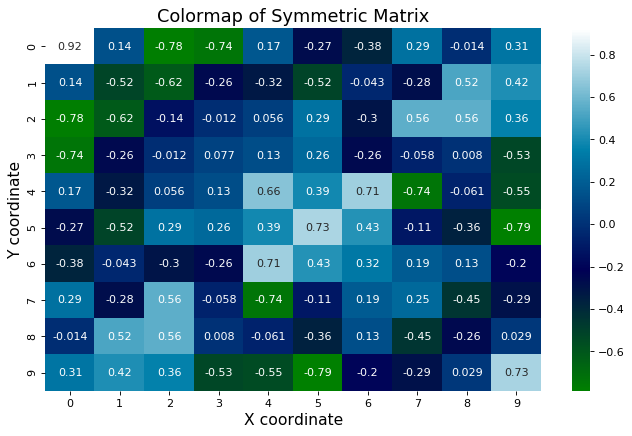

In [31]:
approx.seaborn_visualization(symmetric,heading="Colormap of Symmetric Matrix")   # symmetric matrix colormap

In [32]:
eigenvalues,eigenvectors=approx.eigen_values_plus_vectors(symmetric)

In [33]:
eigen_dict=approx.create_eigenmapping(eigenvalues,eigenvectors)
eigen_dict

{2.6924720278218524: array([-0.36609229, -0.26470185,  0.14855106, -0.58526211,  0.42724757,
         0.32553849,  0.17328568,  0.18497418,  0.27999337, -0.0124401 ]),
 1.9674485155891892: array([-0.25349884, -0.30826134, -0.74780413, -0.09691817, -0.23288385,
         0.09364061,  0.29603339, -0.10084265, -0.30483817, -0.13555206]),
 1.1066879518152821: array([ 0.10087328, -0.57431677, -0.07717423,  0.44009117, -0.04571809,
        -0.03480158,  0.11895166,  0.33305012,  0.38540617,  0.4282962 ]),
 1.6027947619062402: array([ 0.27107691, -0.13458192,  0.02470539,  0.23578785, -0.09037795,
         0.74282294, -0.22653254,  0.10669879,  0.02967463, -0.47818662]),
 1.1658417269663537: array([ 0.36771998,  0.20365352, -0.38124034, -0.49847976, -0.28200798,
        -0.01506431, -0.34321317,  0.36483571,  0.26066761,  0.17572018]),
 0.5918674951326974: array([ 0.51342167,  0.14062223, -0.1696325 , -0.05514051,  0.21977244,
         0.18221052,  0.45516908, -0.53074884,  0.30702065,  0.1420

In [34]:
approximate=approx.matrix_approximation(symmetric,2)

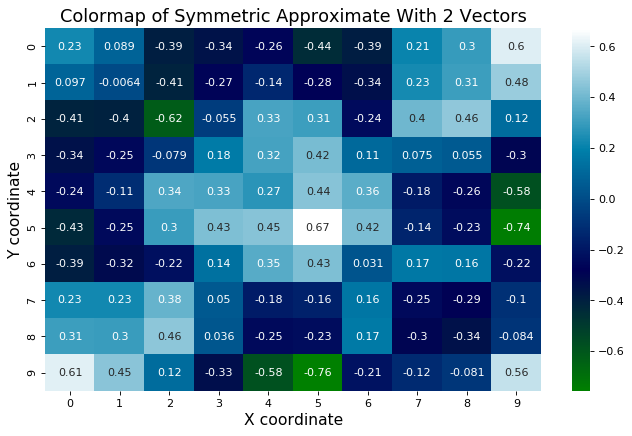

In [35]:
approx.seaborn_visualization(approximate,heading="Colormap of Symmetric Approximate With 2 Vectors")

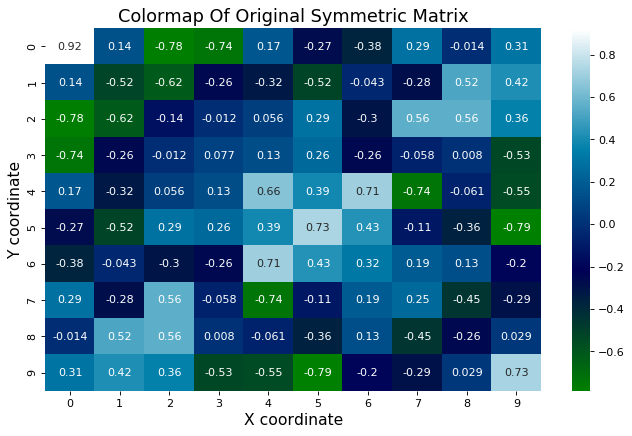

In [36]:
approx.seaborn_visualization(symmetric,heading="Colormap Of Original Symmetric Matrix")

In [37]:
total_loss_after2vec,loss_matrix_after2vec=approx.loss(symmetric,approximate)

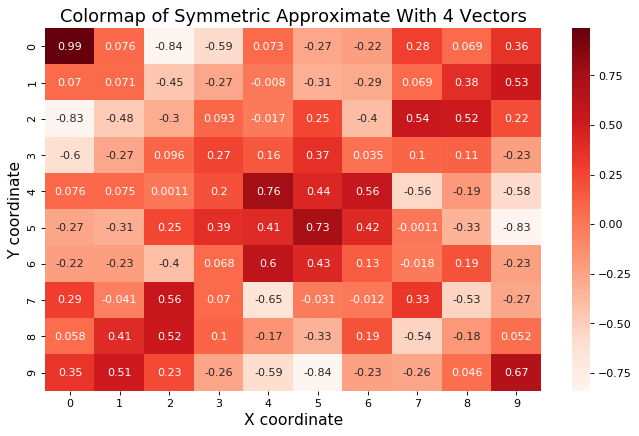

In [38]:
new_approximate=approx.matrix_approximation(symmetric,4)  # taking 4 eigen vectors
approx.seaborn_visualization(new_approximate,colormap='Reds',heading="Colormap of Symmetric Approximate With 4 Vectors")

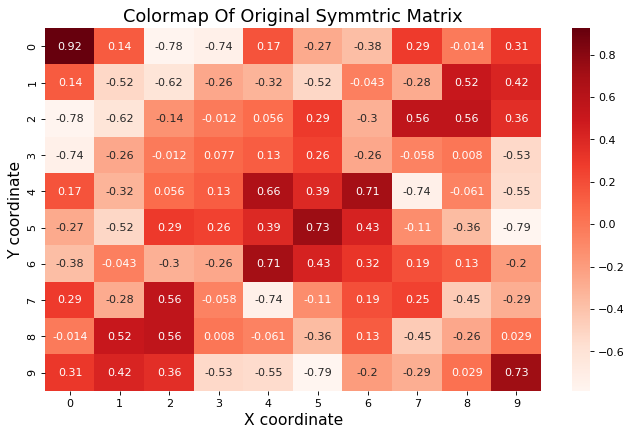

In [39]:
approx.seaborn_visualization(symmetric,colormap="Reds",heading="Colormap Of Original Symmtric Matrix")

In [40]:
total_loss_after4vec,loss_matrix_after4vec=approx.loss(symmetric,new_approximate)

In [41]:
index_list=['Loss with 2 Eigenvectors','Loss with 4 Eigenvectors']
Loss_table=pd.DataFrame([total_loss_after2vec,total_loss_after4vec],index=index_list,columns=['Loss'])
Loss_table

,Loss
Loss with 2 Eigenvectors,6.044
Loss with 4 Eigenvectors,2.121
